**1. Import Libraries
Import the necessary libraries for data manipulation, matrix computation, and modeling.**

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

**2. Load and Prepare Data
Load the dataset containing user-book ratings.**


In [4]:
books = pd.read_csv("/content/Books.csv",encoding='latin-1')
users = pd.read_csv("/content/Users.csv",encoding='latin-1')
ratings = pd.read_csv("/content/Ratings.csv",encoding='latin-1')

**shape is used to show the columns and rows of the
dataset**

In [5]:
print(books.shape)
print(users.shape)
print(ratings.shape)

(271360, 8)
(278858, 3)
(1149780, 3)


**isnull is used to show the null values in the dataset**

In [6]:
print(books.isnull().sum())


ISBN                   0
Book-Title             0
Book-Author            2
Year-Of-Publication    0
Publisher              2
Image-URL-S            0
Image-URL-M            0
Image-URL-L            3
dtype: int64


**dropna is used to drop the null values**

In [7]:
books.dropna(inplace=True)

In [8]:
books.isnull().sum()

,0
ISBN,0
Book-Title,0
Book-Author,0
Year-Of-Publication,0
Publisher,0
Image-URL-S,0
Image-URL-M,0
Image-URL-L,0


**duplicated is used to show the duplicate values**

In [9]:
books.duplicated().sum()

0

**info is used to give the information of the dataset**

In [10]:
books.info()

<class 'pandas.core.frame.DataFrame'>
Index: 271353 entries, 0 to 271359
Data columns (total 8 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   ISBN                 271353 non-null  object
 1   Book-Title           271353 non-null  object
 2   Book-Author          271353 non-null  object
 3   Year-Of-Publication  271353 non-null  object
 4   Publisher            271353 non-null  object
 5   Image-URL-S          271353 non-null  object
 6   Image-URL-M          271353 non-null  object
 7   Image-URL-L          271353 non-null  object
dtypes: object(8)
memory usage: 18.6+ MB


In [11]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,110762


****fillna is used to fill null values using the mean imputation.****

In [12]:
users.fillna(users["Age"].mean(),inplace=True)

In [13]:
users.isnull().sum()

,0
User-ID,0
Location,0
Age,0


In [14]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   User-ID   278858 non-null  int64  
 1   Location  278858 non-null  object 
 2   Age       278858 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 6.4+ MB


In [15]:
ratings.isnull().sum()

,0
User-ID,0
ISBN,0
Book-Rating,0


**This code will return a Series object containing the counts of unique values in the User-ID column of the ratings DataFrame.**

In [16]:
ratings['User-ID'].value_counts()

,count
User-ID,
11676,13602
198711,7550
153662,6109
98391,5891
35859,5850
...,...
116180,1
116166,1
116154,1


**unique gives the unique values of the dataset**

In [17]:
ratings['User-ID'].unique().shape

(105283,)

**This code creates a boolean Series x that indicates whether each user has rated more than 200 books.**

In [18]:
x = ratings['User-ID'].value_counts() > 200

In [19]:
x[x].shape

(899,)

In [20]:
y = x[x].index

In [21]:
y

Index([ 11676, 198711, 153662,  98391,  35859, 212898, 278418,  76352, 110973,
       235105,
       ...
       260183,  73681,  44296, 155916,   9856, 274808,  28634,  59727, 268622,
       188951],
      dtype='int64', name='User-ID', length=899)

In [22]:
ratings = ratings[ratings['User-ID'].isin(y)]

In [23]:
ratings

,User-ID,ISBN,Book-Rating
1456,277427,002542730X,10
1457,277427,0026217457,0
1458,277427,003008685X,8
1459,277427,0030615321,0
1460,277427,0060002050,0
...,...,...,...
1147612,275970,3829021860,0
1147613,275970,4770019572,0
1147614,275970,896086097,0
1147615,275970,9626340762,8


In [24]:
ratings.shape

(526356, 3)

**merge is used to merge two data sets**

In [25]:
ratings_with_books = ratings.merge(books,on='ISBN')

In [26]:
ratings_with_books.head()

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...,http://images.amazon.com/images/P/002542730X.0...
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...,http://images.amazon.com/images/P/0026217457.0...
2,277427,003008685X,8,Pioneers,James Fenimore Cooper,1974,Thomson Learning,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...,http://images.amazon.com/images/P/003008685X.0...
3,277427,0030615321,0,"Ask for May, Settle for June (A Doonesbury book)",G. B. Trudeau,1982,Henry Holt &amp; Co,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...,http://images.amazon.com/images/P/0030615321.0...
4,277427,0060002050,0,On a Wicked Dawn (Cynster Novels),Stephanie Laurens,2002,Avon Books,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...,http://images.amazon.com/images/P/0060002050.0...


In [27]:
ratings_with_books.shape

(487665, 10)

In [28]:
num_rating = ratings_with_books.groupby('Book-Title').count()['Book-Rating'].reset_index()
num_rating.rename(columns={'Book-Rating':'num_ratings'},inplace=True)
num_rating

,Book-Title,num_ratings
0,A Light in the Storm: The Civil War Diary of ...,2
1,Always Have Popsicles,1
2,Apple Magic (The Collector's series),1
3,Beyond IBM: Leadership Marketing and Finance ...,1
4,Clifford Visita El Hospital (Clifford El Gran...,1
...,...,...
160259,Ã?Â?ber die Pflicht zum Ungehorsam gegen den S...,3
160260,Ã?Â?lpiraten.,1
160261,Ã?Â?rger mit Produkt X. Roman.,1
160262,Ã?Â?stlich der Berge.,1


In [29]:
final_rating = ratings_with_books.merge(num_rating,on='Book-Title')

In [30]:
final_rating.drop(columns=['Image-URL-S', 'Image-URL-L'], inplace=True)

In [31]:
final_rating.head(2)

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,num_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
1,277427,0026217457,0,Vegetarian Times Complete Cookbook,Lucy Moll,1995,John Wiley &amp; Sons,http://images.amazon.com/images/P/0026217457.0...,7


In [32]:
final_rating.shape


(487665, 9)

In [33]:
final_rating = final_rating[final_rating['num_ratings']>=50]

In [34]:
final_rating

,User-ID,ISBN,Book-Rating,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-M,num_ratings
0,277427,002542730X,10,Politically Correct Bedtime Stories: Modern Ta...,James Finn Garner,1994,John Wiley &amp; Sons Inc,http://images.amazon.com/images/P/002542730X.0...,82
13,277427,0060930535,0,The Poisonwood Bible: A Novel,Barbara Kingsolver,1999,Perennial,http://images.amazon.com/images/P/0060930535.0...,133
15,277427,0060934417,0,Bel Canto: A Novel,Ann Patchett,2002,Perennial,http://images.amazon.com/images/P/0060934417.0...,108
18,277427,0061009059,9,One for the Money (Stephanie Plum Novels (Pape...,Janet Evanovich,1995,HarperTorch,http://images.amazon.com/images/P/0061009059.0...,108
24,277427,006440188X,0,The Secret Garden,Frances Hodgson Burnett,1998,HarperTrophy,http://images.amazon.com/images/P/006440188X.0...,79
...,...,...,...,...,...,...,...,...,...
487499,275970,1400031354,0,Tears of the Giraffe (No.1 Ladies Detective Ag...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031354.0...,84
487500,275970,1400031362,0,Morality for Beautiful Girls (No.1 Ladies Dete...,Alexander McCall Smith,2002,Anchor,http://images.amazon.com/images/P/1400031362.0...,60
487573,275970,1573229725,0,Fingersmith,Sarah Waters,2002,Riverhead Books,http://images.amazon.com/images/P/1573229725.0...,59
487612,275970,1586210661,9,Me Talk Pretty One Day,David Sedaris,2001,Time Warner Audio Major,http://images.amazon.com/images/P/1586210661.0...,146


In [35]:
final_rating.shape

(61853, 9)

In [36]:
final_rating.drop_duplicates(['User-ID','Book-Title'],inplace=True)

In [37]:
final_rating.shape

(59850, 9)

**Create a pivot table where rows represent books, columns represent users, and the values are the ratings.**

In [38]:
book_pivot = final_rating.pivot_table(columns='User-ID',index='Book-Title',values='Book-Rating')

In [39]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
1st to Die: A Novel,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2nd Chance,NaN,10.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,NaN
4 Blondes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
84 Charing Cross Road,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,10.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,NaN,NaN,NaN,7.0,NaN,NaN,NaN,NaN,7.0,NaN,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN
You Belong To Me,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,0.0,...,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN


In [40]:
book_pivot.shape

(742, 888)

In [41]:
book_pivot.fillna(0,inplace=True)

In [42]:
book_pivot

User-ID,254,2276,2766,2977,3363,3757,4017,4385,6242,6251,...,274004,274061,274301,274308,274808,275970,277427,277478,277639,278418
Book-Title,,,,,,,,,,,,,,,,,,,,,
1984,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1st to Die: A Novel,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2nd Chance,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4 Blondes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
84 Charing Cross Road,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Year of Wonders,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,7.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
You Belong To Me,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Zen and the Art of Motorcycle Maintenance: An Inquiry into Values,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**heatmap of the given code**

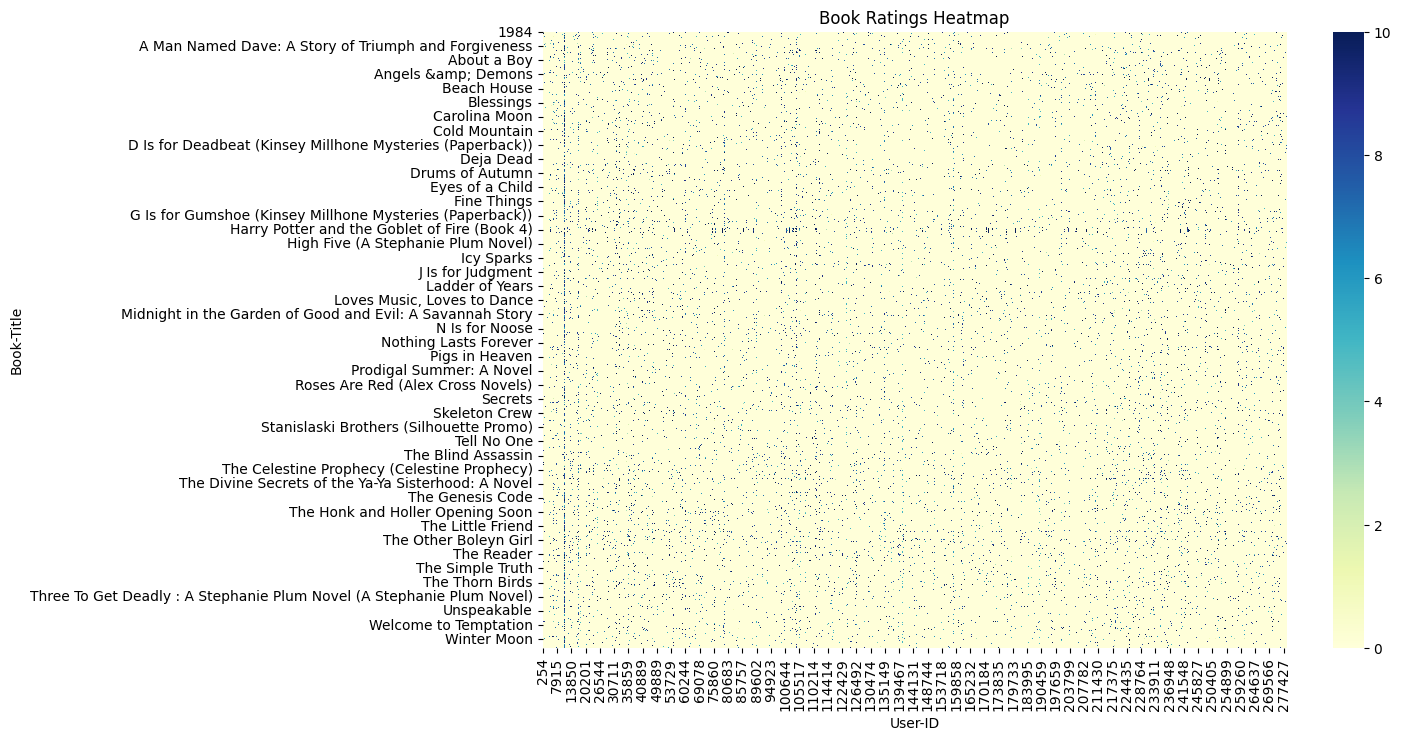

In [43]:

    plt.figure(figsize=(12, 8))  # Adjust figure size if needed
    sns.heatmap(book_pivot, cmap='YlGnBu', annot=False)  # Customize cmap and annot
    plt.title('Book Ratings Heatmap')
    plt.xlabel('User-ID')
    plt.ylabel('Book-Title')
    plt.show()

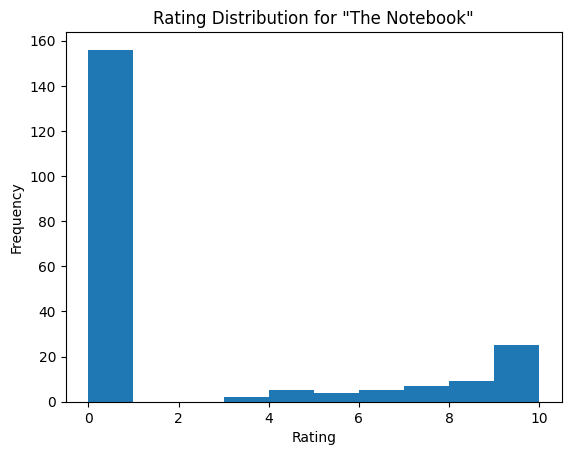

In [44]:


    # Histogram for ratings of a specific book (e.g., 'The Notebook')
    plt.hist(final_rating[final_rating['Book-Title'] == 'The Notebook']['Book-Rating'], bins=10)
    plt.title('Rating Distribution for "The Notebook"')
    plt.xlabel('Rating')
    plt.ylabel('Frequency')
    plt.show()

**Book Ratings Distribution**

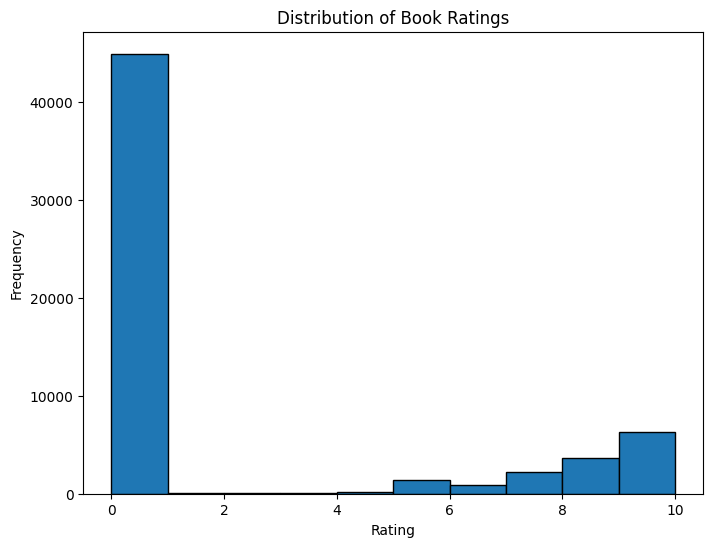

In [45]:
plt.figure(figsize=(8, 6))
plt.hist(final_rating['Book-Rating'], bins=10, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

**Number of Ratings per Book Distribution**

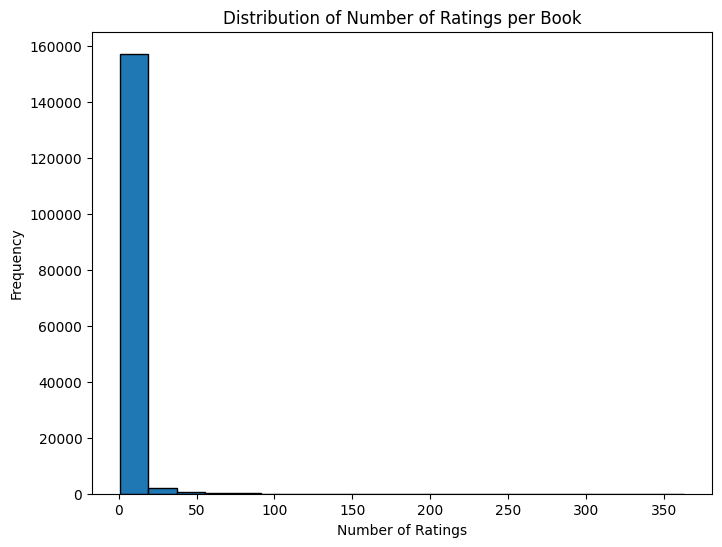

In [46]:
plt.figure(figsize=(8, 6))
plt.hist(num_rating['num_ratings'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

**User Age Distribution**

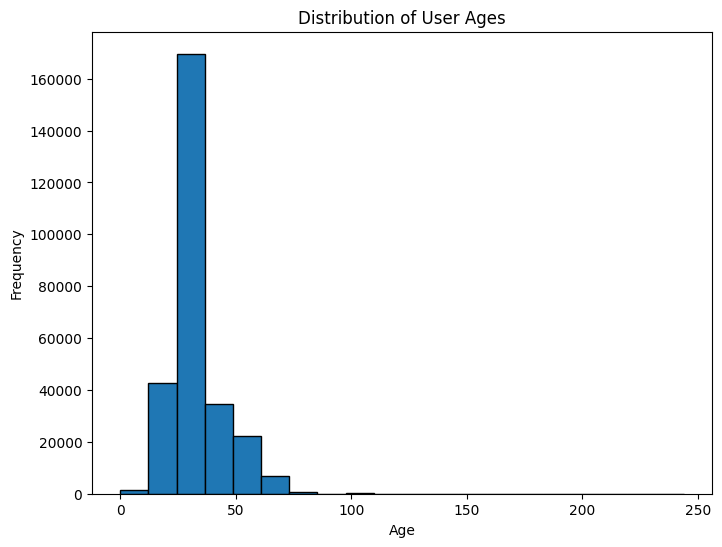

In [47]:
plt.figure(figsize=(8, 6))
plt.hist(users['Age'], bins=20, edgecolor='black')  # Adjust bins as needed
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()


**Book Rating Distribution**

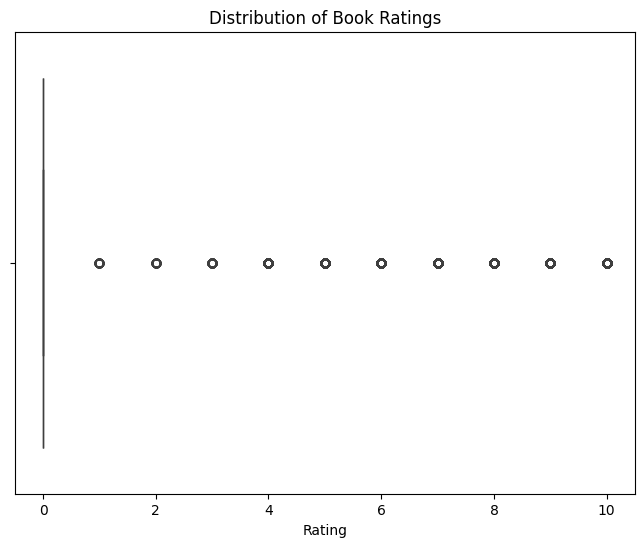

In [48]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=final_rating['Book-Rating'])
plt.title('Distribution of Book Ratings')
plt.xlabel('Rating')
plt.show()

**Number of Ratings per Book**

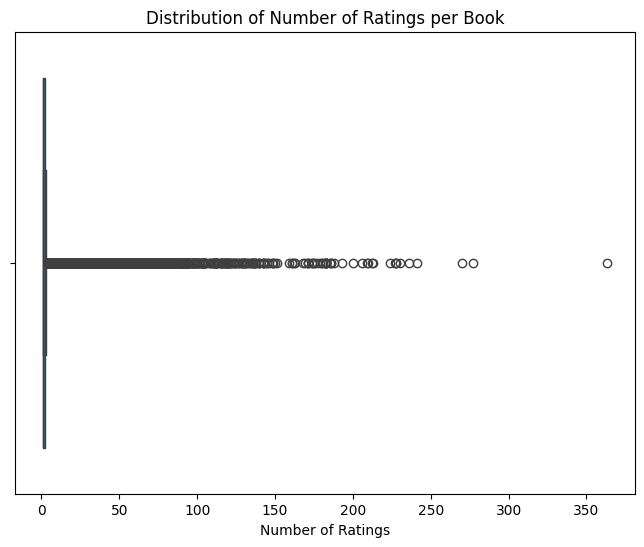

In [49]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=num_rating['num_ratings'])
plt.title('Distribution of Number of Ratings per Book')
plt.xlabel('Number of Ratings')
plt.show()

**User Age Distribution**

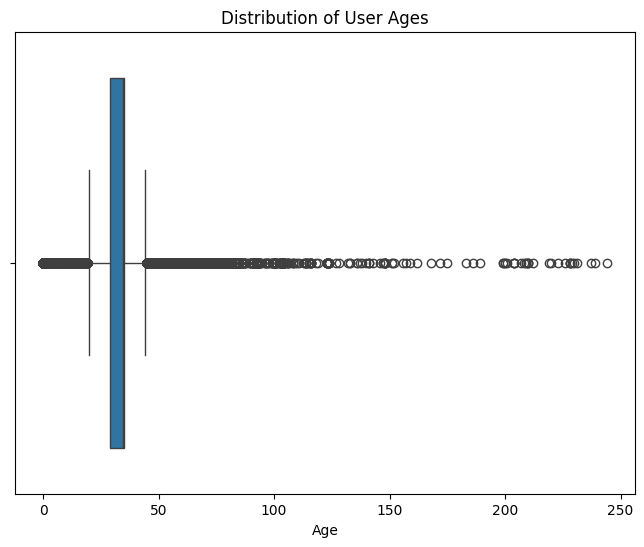

In [50]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=users['Age'])
plt.title('Distribution of User Ages')
plt.xlabel('Age')
plt.show()

**removing the outliers**

**Book Rating Distribution**

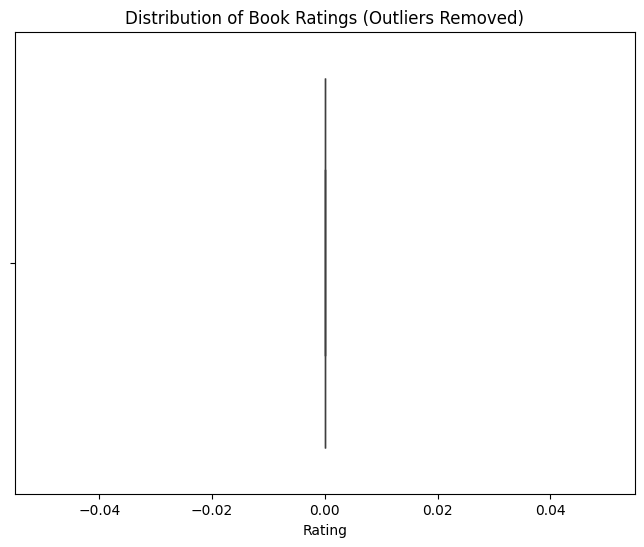

In [51]:
    # Calculate the IQR
    Q1 = final_rating['Book-Rating'].quantile(0.25)
    Q3 = final_rating['Book-Rating'].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_ratings = final_rating[(final_rating['Book-Rating'] >= lower_bound) & (final_rating['Book-Rating'] <= upper_bound)]

    # Create the box plot without outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=filtered_ratings['Book-Rating'], showfliers=False)  # showfliers=False to hide outliers
    plt.title('Distribution of Book Ratings (Outliers Removed)')
    plt.xlabel('Rating')
    plt.show()

**Number of Ratings per Book**

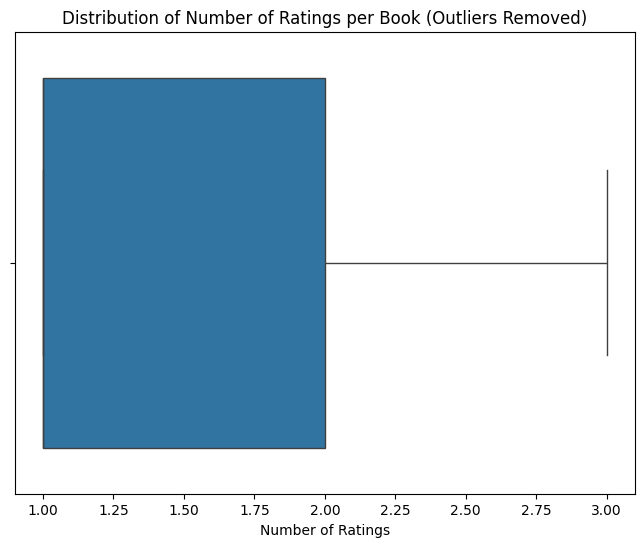

In [52]:
    # Calculate the IQR
    Q1 = num_rating['num_ratings'].quantile(0.25)
    Q3 = num_rating['num_ratings'].quantile(0.75)
    IQR = Q3 - Q1

    # Define upper and lower bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filter out outliers
    filtered_num_ratings = num_rating[(num_rating['num_ratings'] >= lower_bound) & (num_rating['num_ratings'] <= upper_bound)]

    # Create the box plot without outliers
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=filtered_num_ratings['num_ratings'], showfliers=False)  # showfliers=False to hide outliers
    plt.title('Distribution of Number of Ratings per Book (Outliers Removed)')
    plt.xlabel('Number of Ratings')
    plt.show()

**User Age Distribution**

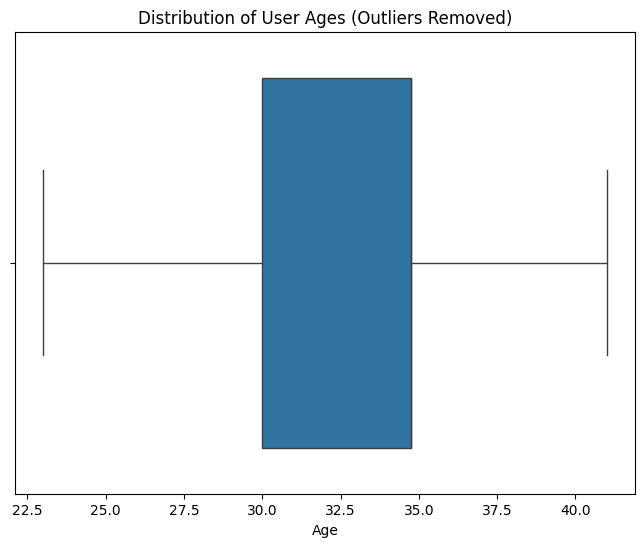

In [53]:
# Calculate the IQR
Q1 = users['Age'].quantile(0.25)
Q3 = users['Age'].quantile(0.75)
IQR = Q3 - Q1

# Define upper and lower bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
filtered_users = users[(users['Age'] >= lower_bound) & (users['Age'] <= upper_bound)]

# Create the box plot without outliers
plt.figure(figsize=(8, 6))
sns.boxplot(x=filtered_users['Age'], showfliers=False)  # showfliers=False to hide outliers
plt.title('Distribution of User Ages (Outliers Removed)')
plt.xlabel('Age')
plt.show()

**Heatmap**

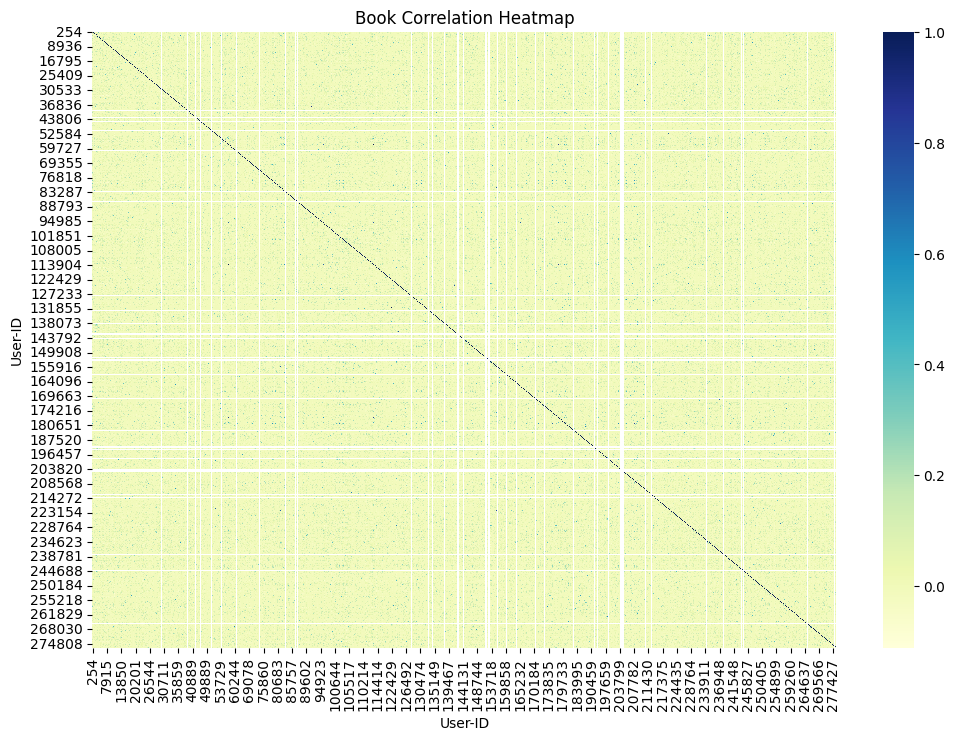

In [54]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))  # Adjust size as needed
sns.heatmap(book_pivot.corr(), cmap='YlGnBu', annot=False)  # Customize cmap and annot
plt.title('Book Correlation Heatmap')
plt.show()

**Pairplot**

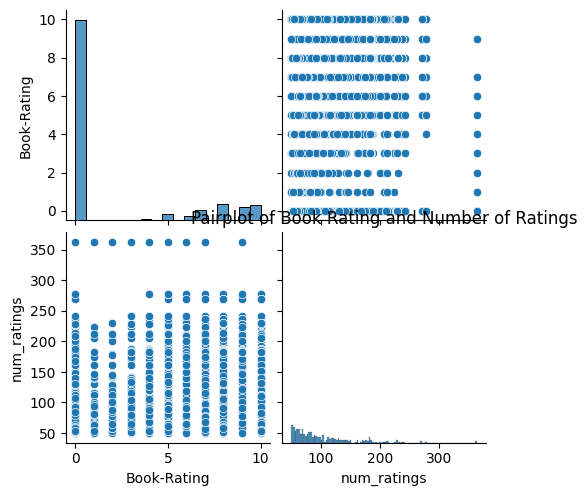

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select numerical features for the pairplot
pairplot_data = final_rating[['Book-Rating', 'num_ratings']]  # Add other relevant features if needed

sns.pairplot(pairplot_data)
plt.title('Pairplot of Book Rating and Number of Ratings')
plt.show()

**Convert to Sparse Matrix
Convert the pivot table into a sparse matrix to optimize memory and speed for large dataset**

In [56]:
from scipy.sparse import csr_matrix
book_sparse = csr_matrix(book_pivot)

In [57]:
book_sparse

<742x888 sparse matrix of type '<class 'numpy.float64'>'
	with 14961 stored elements in Compressed Sparse Row format>

**Train the Recommendation Model
Use K-Nearest Neighbors (KNN) to train a model on the sparse matrix, using cosine similarity to find similar books.**

In [58]:
from sklearn.neighbors import NearestNeighbors
model = NearestNeighbors(algorithm='brute')
model.fit(book_sparse)


NearestNeighbors(algorithm='brute')

**Make Recommendations
Select a specific book and use the trained KNN model to find the most similar books based on user ratings.**

In [59]:
distances, suggestions = model.kneighbors(book_pivot.iloc[237, :].values.reshape(1, -1),n_neighbors=6)

In [60]:
distances

array([[ 0.        , 67.75691847, 68.05145112, 72.277244  , 75.81556568,
        76.30203143]])

In [61]:
suggestions

array([[237, 238, 240, 241, 184, 536]])

In [62]:
for i in range(len(suggestions)):
  print(book_pivot.index[suggestions[i]])

Index(['Harry Potter and the Chamber of Secrets (Book 2)',
       'Harry Potter and the Goblet of Fire (Book 4)',
       'Harry Potter and the Prisoner of Azkaban (Book 3)',
       'Harry Potter and the Sorcerer's Stone (Book 1)', 'Exclusive',
       'The Cradle Will Fall'],
      dtype='object', name='Book-Title')


In [63]:
book_pivot.index[3]

'4 Blondes'

In [64]:
books_name = book_pivot.index

In [65]:
books_name

Index(['1984', '1st to Die: A Novel', '2nd Chance', '4 Blondes',
       '84 Charing Cross Road', 'A Bend in the Road', 'A Case of Need',
       'A Child Called \It\": One Child's Courage to Survive"',
       'A Civil Action', 'A Cry In The Night',
       ...
       'Winter Solstice', 'Wish You Well', 'Without Remorse',
       'Wizard and Glass (The Dark Tower, Book 4)', 'Wuthering Heights',
       'Year of Wonders', 'You Belong To Me',
       'Zen and the Art of Motorcycle Maintenance: An Inquiry into Values',
       'Zoya', '\O\" Is for Outlaw"'],
      dtype='object', name='Book-Title', length=742)

**Save the Model and Data
Save the trained model and important data structures (e.g., book titles) using pickle for future use**

In [66]:
import pickle
pickle.dump(model,open('model.pkl','wb'))
pickle.dump(books_name,open('books_name.pkl','wb'))
pickle.dump(final_rating,open('final_rating.pkl','wb'))
pickle.dump(book_pivot,open('book_pivot.pkl','wb'))